# 중고차 판매 정보 분석 실습

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# vehicles.csv 파일을 읽어 df 변수에 저장하세요.
df = pd.read_csv('./vehicles.csv')
df

,Unnamed: 0,제조사,모델,연식,주행거리,연료,변속기,기통,구동방식,등급,유형,색상,상태,가격
0,0,chevrolet,c-10,1974.0,305710,휘발유,자동,4,전륜구동,대형,픽업트럭,파란색,좋음,2400000
1,1,ford,f350 lariat,2005.0,186644,경유,자동,8,사륜구동,대형,픽업트럭,파란색,훌륭함,23400000
2,2,ford,expedition,2003.0,284793,휘발유,자동,8,전륜구동,대형,SUV,파란색,좋음,5880000
3,3,jeep,gladiator,2020.0,16894,휘발유,자동,6,사륜구동,대형,픽업트럭,회색,새거같음,56400000
4,4,ford,fusion sel,2010.0,131938,휘발유,자동,6,후륜구동,대형,세단,은색,좋음,7500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82758,82758,buick,lacrosse cx,2006.0,195474,휘발유,자동,6,후륜구동,중형,세단,검은색,좋음,5394000
82759,82759,cadillac,srx,2014.0,134818,휘발유,자동,6,사륜구동,중형,SUV,은색,훌륭함,17994000
82760,82760,hyundai,tucson,2018.0,51307,휘발유,자동,4,사륜구동,중형,SUV,흰색,훌륭함,21474000
82761,82761,cadillac,cts coupe awd,2014.0,85277,휘발유,자동,6,사륜구동,중형,쿠페,검은색,훌륭함,21480000


In [3]:
# Unnamed: 0 컬럼을 제거하세요.
df = df.drop('Unnamed: 0', axis=1)
df

,제조사,모델,연식,주행거리,연료,변속기,기통,구동방식,등급,유형,색상,상태,가격
0,chevrolet,c-10,1974.0,305710,휘발유,자동,4,전륜구동,대형,픽업트럭,파란색,좋음,2400000
1,ford,f350 lariat,2005.0,186644,경유,자동,8,사륜구동,대형,픽업트럭,파란색,훌륭함,23400000
2,ford,expedition,2003.0,284793,휘발유,자동,8,전륜구동,대형,SUV,파란색,좋음,5880000
3,jeep,gladiator,2020.0,16894,휘발유,자동,6,사륜구동,대형,픽업트럭,회색,새거같음,56400000
4,ford,fusion sel,2010.0,131938,휘발유,자동,6,후륜구동,대형,세단,은색,좋음,7500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82758,buick,lacrosse cx,2006.0,195474,휘발유,자동,6,후륜구동,중형,세단,검은색,좋음,5394000
82759,cadillac,srx,2014.0,134818,휘발유,자동,6,사륜구동,중형,SUV,은색,훌륭함,17994000
82760,hyundai,tucson,2018.0,51307,휘발유,자동,4,사륜구동,중형,SUV,흰색,훌륭함,21474000
82761,cadillac,cts coupe awd,2014.0,85277,휘발유,자동,6,사륜구동,중형,쿠페,검은색,훌륭함,21480000


In [4]:
# 가격 컬럼의 단위를 만원으로 변경하세요.
df.loc[:, "가격"] = df.loc[:, "가격"]/10000
df

,제조사,모델,연식,주행거리,연료,변속기,기통,구동방식,등급,유형,색상,상태,가격
0,chevrolet,c-10,1974.0,305710,휘발유,자동,4,전륜구동,대형,픽업트럭,파란색,좋음,240.0
1,ford,f350 lariat,2005.0,186644,경유,자동,8,사륜구동,대형,픽업트럭,파란색,훌륭함,2340.0
2,ford,expedition,2003.0,284793,휘발유,자동,8,전륜구동,대형,SUV,파란색,좋음,588.0
3,jeep,gladiator,2020.0,16894,휘발유,자동,6,사륜구동,대형,픽업트럭,회색,새거같음,5640.0
4,ford,fusion sel,2010.0,131938,휘발유,자동,6,후륜구동,대형,세단,은색,좋음,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82758,buick,lacrosse cx,2006.0,195474,휘발유,자동,6,후륜구동,중형,세단,검은색,좋음,539.4
82759,cadillac,srx,2014.0,134818,휘발유,자동,6,사륜구동,중형,SUV,은색,훌륭함,1799.4
82760,hyundai,tucson,2018.0,51307,휘발유,자동,4,사륜구동,중형,SUV,흰색,훌륭함,2147.4
82761,cadillac,cts coupe awd,2014.0,85277,휘발유,자동,6,사륜구동,중형,쿠페,검은색,훌륭함,2148.0


In [5]:
# 제조사별 판매 차량 수를 출력하세요.
df['제조사'].value_counts()

ford               15656
chevrolet          12344
toyota              7394
honda               5506
nissan              4588
jeep                3325
gmc                 3205
dodge               2969
ram                 2763
hyundai             2098
subaru              2081
bmw                 2019
volkswagen          1914
mercedes-benz       1827
kia                 1598
chrysler            1576
cadillac            1314
mazda               1177
lexus               1175
buick               1101
audi                 906
acura                768
pontiac              765
lincoln              739
volvo                664
infiniti             572
mitsubishi           561
mercury              461
mini                 410
saturn               370
rover                216
porsche              212
jaguar               203
fiat                 156
tesla                 58
alfa-romeo            18
harley-davidson       17
land rover            15
datsun                10
ferrari                6


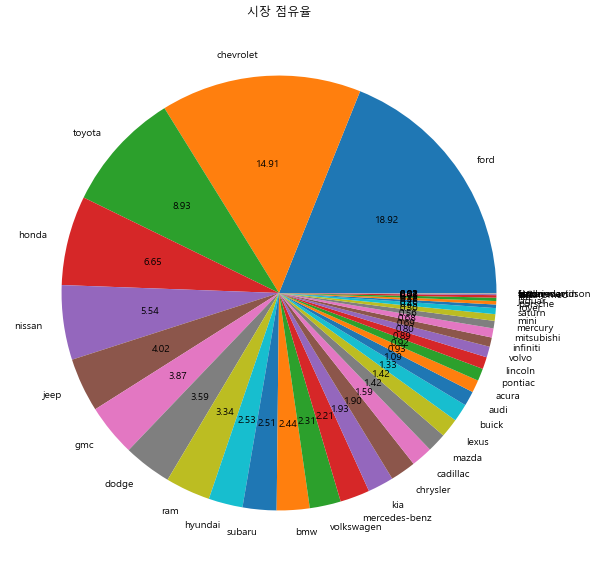

In [6]:
# 제조사별 판매 차량 수를 파이차트로 시각화하세요.
plt.figure(figsize = (10,10))

d = df['제조사'].value_counts().to_frame()
d['제조사명'] = d.index

x = d['제조사']
labels = d['제조사명']

plt.pie(x,labels=labels, autopct='%.2f')
plt.title("시장 점유율")

plt.show()

In [7]:
# 유형별 판매 차량 수를 출력하세요.
df['유형'].value_counts()

세단      24413
SUV     21850
트럭      12483
픽업트럭     6209
쿠페       4195
해치백      3721
밴        3469
미니밴      2257
컨버터블     1814
웨건       1599
기타        370
오프로드      282
버스        101
Name: 유형, dtype: int64

In [8]:
u = df['유형'].value_counts().to_frame()
u['유형명'] = u.index

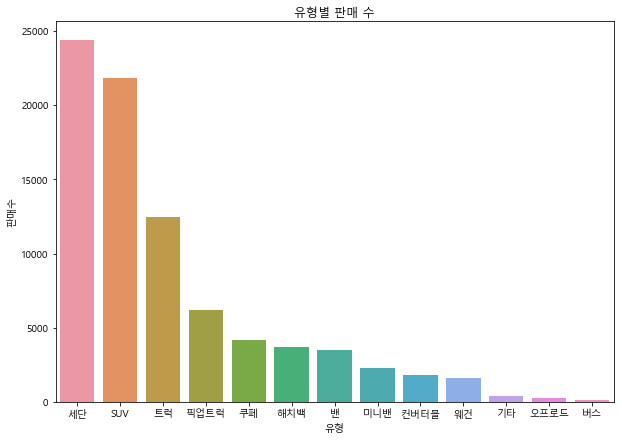

In [9]:
# 유형별 판매 차량 수를 bar 차트로 시각화하세요.
plt.figure(figsize=(10, 7))

sns.barplot(x="유형명",y="유형",data = u)
plt.title('유형별 판매 수')
plt.xlabel('유형')
plt.ylabel('판매수')
plt.show()

In [10]:
# 판매 가격이 가장 높은 데이터 6개를 출력하세요.
df.sort_values(by='가격', ascending=False).head(6)

,제조사,모델,연식,주행거리,연료,변속기,기통,구동방식,등급,유형,색상,상태,가격
73366,ford,f-150,2016.0,94931,휘발유,자동,6,사륜구동,대형,픽업트럭,검은색,훌륭함,41400.00
60153,gmc,sierra 1500 slt z71,2015.0,122284,휘발유,자동,8,사륜구동,대형,트럭,흰색,새거같음,36239.88
5624,ferrari,488 gtb,2018.0,5699,휘발유,자동,8,전륜구동,중형,쿠페,빨간색,새거같음,28200.00
44858,ferrari,488 gtb,2018.0,5699,휘발유,자동,8,전륜구동,중형,쿠페,빨간색,새거같음,28200.00
79602,mercedes-benz,benz 420 sel,1987.0,172163,휘발유,자동,8,전륜구동,대형,세단,회색,훌륭함,28148.04
72882,ford,f-350 diesel xlt,2014.0,195562,경유,자동,8,사륜구동,대형,트럭,흰색,좋음,27599.88


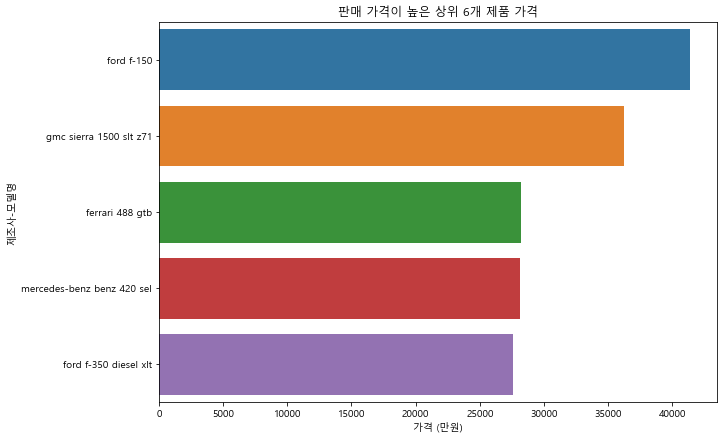

In [11]:
# 판매 가격이 가장 높은 6개 제품을 '제조사:모델' 대비 가격의 형태로 bar 차트 시각화하세요.
plt.figure(figsize=(10, 7))

top6 = df.sort_values(by='가격', ascending=False).head(6)
top6['제조사:모델'] = top6['제조사'] + " " + top6['모델']
sns.barplot(x='가격', y='제조사:모델', data=top6)
plt.title('판매 가격이 높은 상위 6개 제품 가격')
plt.xlabel('가격 (만원)')
plt.ylabel('제조사-모델명')

plt.show()

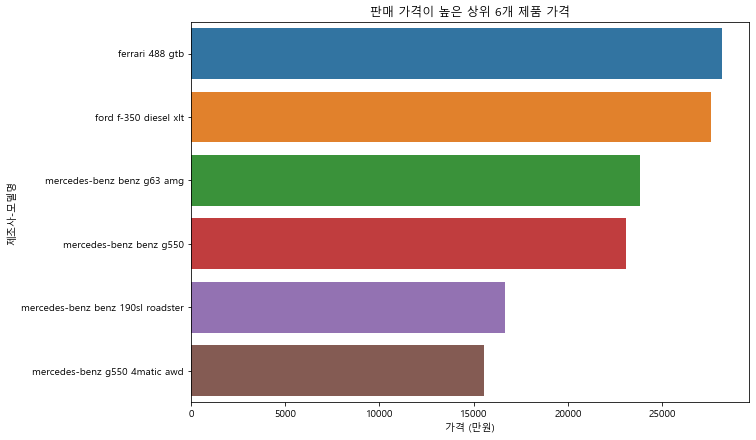

In [12]:
# 평균 판매 가격이 높은 6개 제품을 '제조사:모델' 대비 가격의 형태로 bar 차트 시각화하세요.
plt.figure(figsize=(10, 7))

top6 = df.groupby(['제조사','모델'])[['가격']].mean().sort_values(by='가격',ascending=False).head(6)
top6.reset_index(level=['제조사'], inplace = True)
top6.reset_index(level=['모델'], inplace = True)
top6['제조사:모델'] = top6['제조사'] + " " + top6['모델']
sns.barplot(x='가격', y='제조사:모델', data=top6)
plt.title('판매 가격이 높은 상위 6개 제품 가격')
plt.xlabel('가격 (만원)')
plt.ylabel('제조사-모델명')

plt.show()

In [13]:
# 연식, 주행거리, 가격 간의 상관 계수를 출력하세요.
df[['연식','주행거리','가격']].corr()

,연식,주행거리,가격
연식,1.000000,-0.162654,0.334910
주행거리,-0.162654,1.000000,-0.178899
가격,0.334910,-0.178899,1.000000


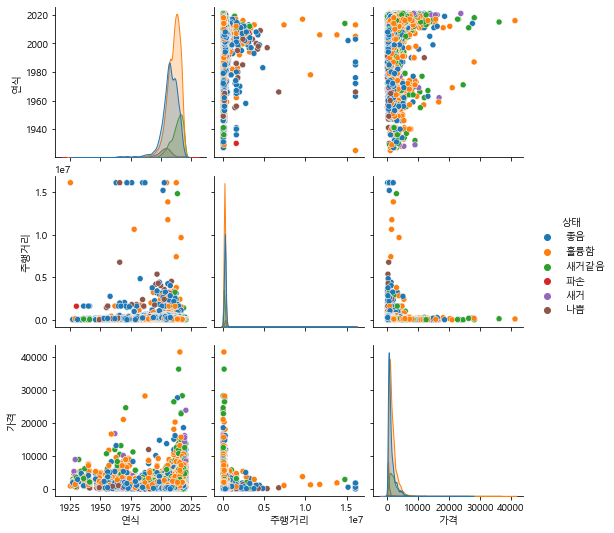

In [14]:
# 연식, 주행거리, 가격 간의 관계를 pairplot을 이용하여 상태 별로 시각화하세요.

sns.pairplot(df[['연식','주행거리','가격','상태']],hue='상태')
plt.show()

<Figure size 720x504 with 0 Axes>

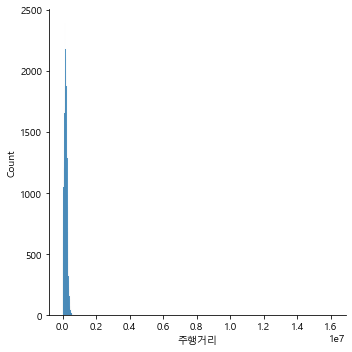

In [15]:
# 주행거리 열을 히스토그램으로 시각화하세요.
plt.figure(figsize=(10, 7))
sns.displot(df['주행거리'])
plt.show()

In [16]:
# 주행거리 열을 로그로 변환하여 주행거리_로그 열에 저장하세요. (그대로 실행하세요)
import numpy as np

df['주행거리_로그'] = np.log1p(df['주행거리'])
df.head()

,제조사,모델,연식,주행거리,연료,변속기,기통,구동방식,등급,유형,색상,상태,가격,주행거리_로그
0,chevrolet,c-10,1974.0,305710,휘발유,자동,4,전륜구동,대형,픽업트럭,파란색,좋음,240.0,12.630395
1,ford,f350 lariat,2005.0,186644,경유,자동,8,사륜구동,대형,픽업트럭,파란색,훌륭함,2340.0,12.136964
2,ford,expedition,2003.0,284793,휘발유,자동,8,전륜구동,대형,SUV,파란색,좋음,588.0,12.559521
3,jeep,gladiator,2020.0,16894,휘발유,자동,6,사륜구동,대형,픽업트럭,회색,새거같음,5640.0,9.734773
4,ford,fusion sel,2010.0,131938,휘발유,자동,6,후륜구동,대형,세단,은색,좋음,750.0,11.790095


<Figure size 720x504 with 0 Axes>

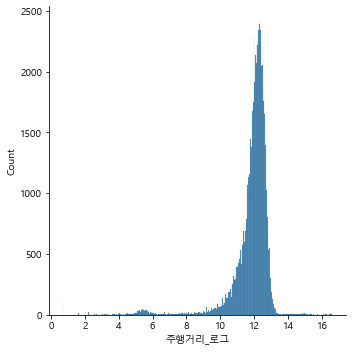

In [17]:
# 주행거리 로그 열을 히스토그램으로 시각화하세요.
plt.figure(figsize=(10, 7))
sns.displot(df['주행거리_로그'])
plt.show()

In [18]:
df

,제조사,모델,연식,주행거리,연료,변속기,기통,구동방식,등급,유형,색상,상태,가격,주행거리_로그
0,chevrolet,c-10,1974.0,305710,휘발유,자동,4,전륜구동,대형,픽업트럭,파란색,좋음,240.0,12.630395
1,ford,f350 lariat,2005.0,186644,경유,자동,8,사륜구동,대형,픽업트럭,파란색,훌륭함,2340.0,12.136964
2,ford,expedition,2003.0,284793,휘발유,자동,8,전륜구동,대형,SUV,파란색,좋음,588.0,12.559521
3,jeep,gladiator,2020.0,16894,휘발유,자동,6,사륜구동,대형,픽업트럭,회색,새거같음,5640.0,9.734773
4,ford,fusion sel,2010.0,131938,휘발유,자동,6,후륜구동,대형,세단,은색,좋음,750.0,11.790095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82758,buick,lacrosse cx,2006.0,195474,휘발유,자동,6,후륜구동,중형,세단,검은색,좋음,539.4,12.183188
82759,cadillac,srx,2014.0,134818,휘발유,자동,6,사륜구동,중형,SUV,은색,훌륭함,1799.4,11.811688
82760,hyundai,tucson,2018.0,51307,휘발유,자동,4,사륜구동,중형,SUV,흰색,훌륭함,2147.4,10.845602
82761,cadillac,cts coupe awd,2014.0,85277,휘발유,자동,6,사륜구동,중형,쿠페,검은색,훌륭함,2148.0,11.353672


In [19]:
# df에 새 열 '변속기_변환'을 추가하세요.
# 값은 아래 조건에 따라 설정하세요.
# 변속기의 값이 기타면 0
# 변속기의 값이 수동이면 1
# 변속기의 값이 자동이면 2

conditionlist = [
    (df['변속기'] == '기타') ,
    (df['변속기'] == '수동'),
    (df['변속기'] == '자동')]
choicelist = [0, 1, 2]

df['변속기_변환'] = np.select(conditionlist, choicelist, default='Error')
df['변속기_변환']

0        2
1        2
2        2
3        2
4        2
        ..
82758    2
82759    2
82760    2
82761    2
82762    2
Name: 변속기_변환, Length: 82763, dtype: object

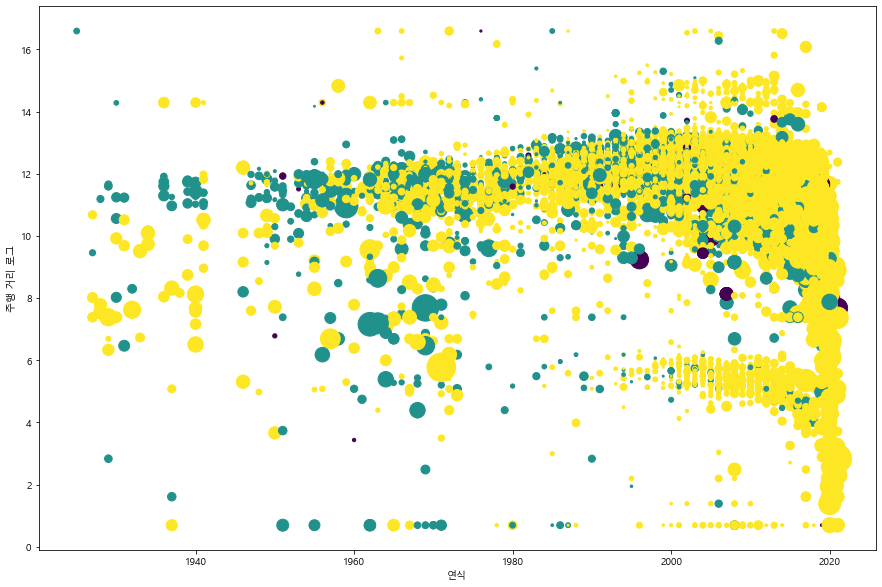

In [20]:
# 연식, 주행거리, 가격, 변속기 간의 관계를 버블 차트(scatter)로 시각화하세요.
# x=연식, y=주행거리_로그, s=가격/30, c=변속기_변환
plt.figure(figsize=(15, 10))


plt.scatter(x=df['연식'],y=df['주행거리_로그'], s=df['가격']/30, c=pd.Categorical(df['변속기_변환']).codes)
plt.xlabel('연식')
plt.ylabel('주행 거리 로그')
plt.show()

In [21]:
# 주행거리가 100000보다 큰 데이터만 추출한 후 df_100k에 저장하세요.
df_100k = df[df['주행거리'] > 100000]
df_100k.head()

,제조사,모델,연식,주행거리,연료,변속기,기통,구동방식,등급,유형,색상,상태,가격,주행거리_로그,변속기_변환
0,chevrolet,c-10,1974.0,305710,휘발유,자동,4,전륜구동,대형,픽업트럭,파란색,좋음,240.0,12.630395,2
1,ford,f350 lariat,2005.0,186644,경유,자동,8,사륜구동,대형,픽업트럭,파란색,훌륭함,2340.0,12.136964,2
2,ford,expedition,2003.0,284793,휘발유,자동,8,전륜구동,대형,SUV,파란색,좋음,588.0,12.559521,2
4,ford,fusion sel,2010.0,131938,휘발유,자동,6,후륜구동,대형,세단,은색,좋음,750.0,11.790095,2
5,jeep,wrangler unlimited,2015.0,135156,휘발유,자동,6,사륜구동,대형,SUV,흰색,새거같음,3300.0,11.814192,2


In [22]:
# df_100k의 유형 별 평균 가격을 계산하고 내림차순 정렬하여 출력하세요.
df_100k_mean = df_100k.groupby('유형')['가격'].mean().sort_values(ascending=False)
df_100k_mean =df_100k_mean.to_frame()
df_100k_mean.reset_index(level=['유형'],inplace=True)
df_100k_mean

,유형,가격
0,트럭,2113.137497
1,픽업트럭,1725.513712
2,오프로드,1703.187560
3,밴,1443.856022
4,버스,1333.249412
5,컨버터블,1186.564605
6,SUV,1181.856847
7,쿠페,1040.375645
8,기타,990.854583
9,웨건,822.916891


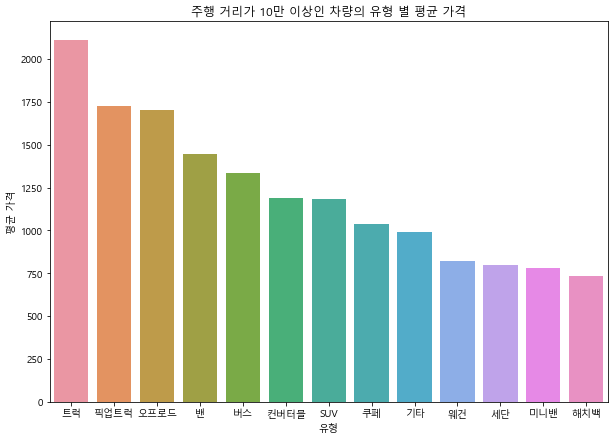

In [23]:
# 위 데이터를 bar 차트로 시각화하세요.
plt.figure(figsize=(10, 7))

sns.barplot(x='유형',y='가격',data=df_100k_mean)
plt.title('주행 거리가 10만 이상인 차량의 유형 별 평균 가격')
plt.xlabel('유형')
plt.ylabel('평균 가격')

plt.show()